Data Loaded Successfully


,Order ID,Date,Day,Season,Customer Name,City,Region,State,Category,Sub Category,Sales,Discount,Profit,Average Temp,Holiday
0,OD1,08-Nov-17,Wednesday,Post-Monsoon,Harish,Vellore,North,Tamil Nadu,Oil & Masala,Masalas,1254,0.1,401,29.4,No
1,OD2,08-Nov-17,Wednesday,Post-Monsoon,Sudha,Krishnagiri,South,Tamil Nadu,Beverages,Health Drinks,749,0.2,150,29.4,No
2,OD3,12-Jun-17,Monday,Summer,Hussain,Perambalur,West,Tamil Nadu,Food Grains,Atta & Flour,2360,0.2,165,28.3,No
3,OD4,11-Oct-16,Tuesday,Post-Monsoon,Jackson,Dharmapuri,South,Tamil Nadu,Fruits & Veggies,Fresh Vegetables,896,0.3,90,28.3,Yes
4,OD5,11-Oct-16,Tuesday,Post-Monsoon,Ridhesh,Ooty,South,Tamil Nadu,Food Grains,Organic Staples,2355,0.3,919,28.3,Yes


Mean Absolute Error: 2.8047773886943466
Mean Squared Error: 15.827505302651327
R-squared: 0.9997350058910917
Model saved as 'random_forest_model.pkl'

Correlation Heatmap:


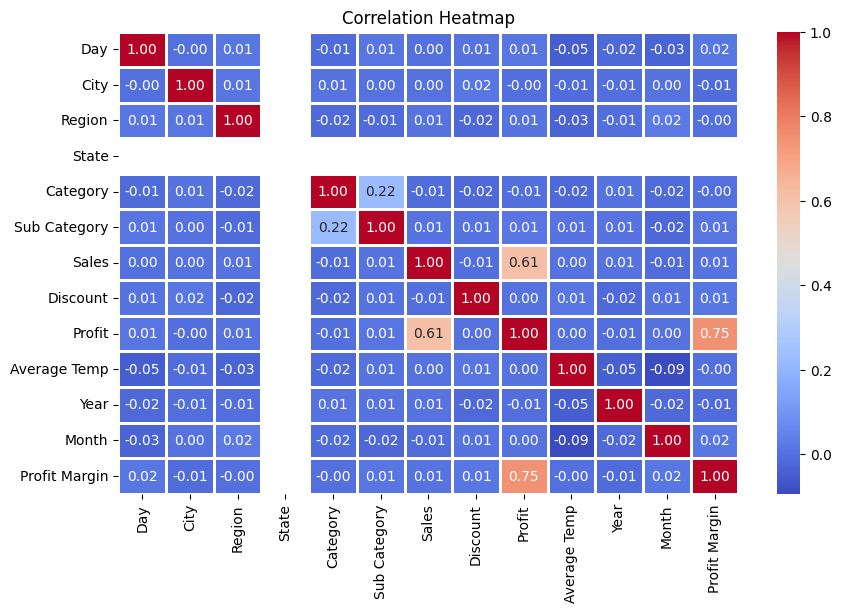


Profit Distribution:


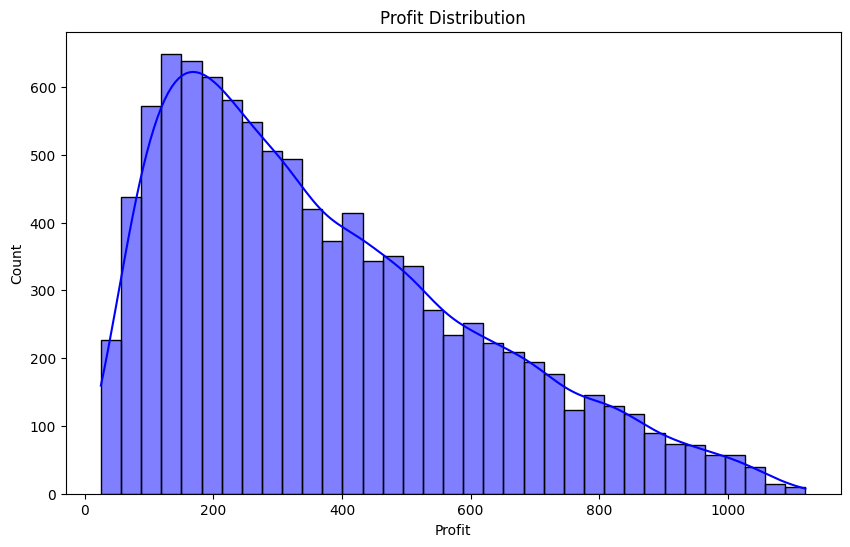


Sales vs Profit:


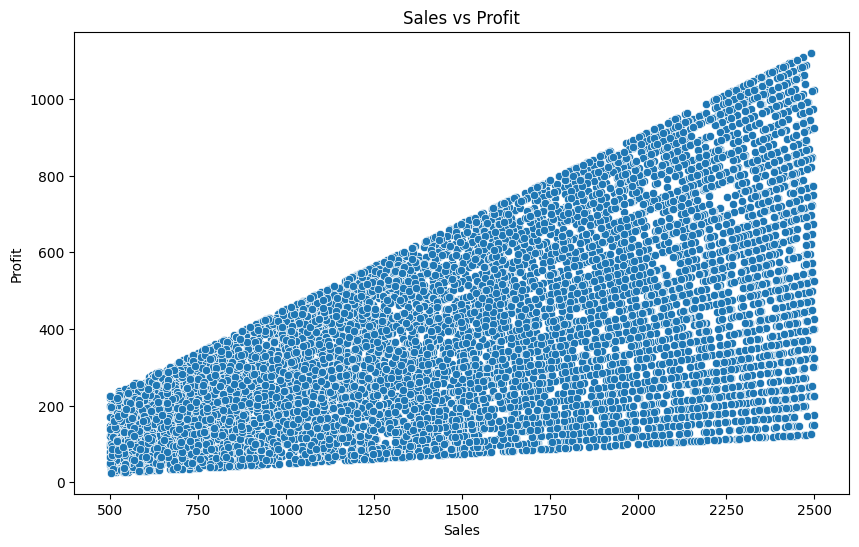


Discount vs Profit:


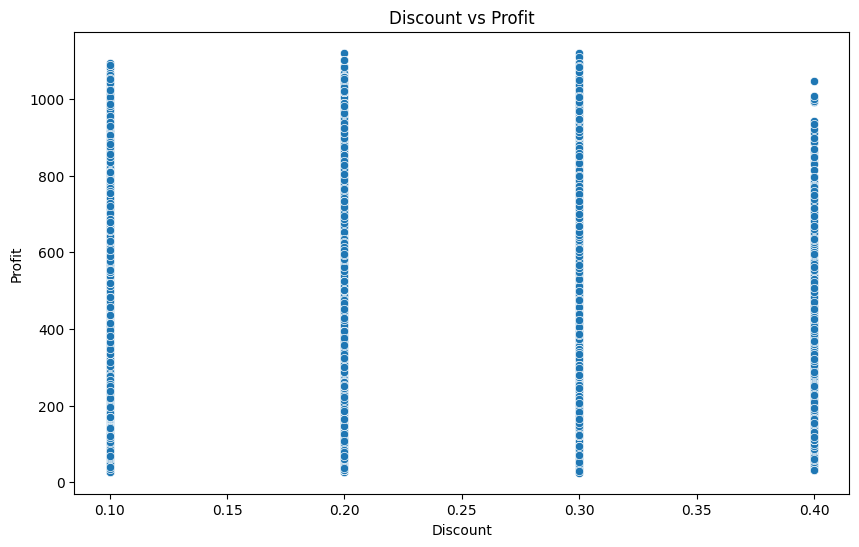


Actual vs Predicted Profit:


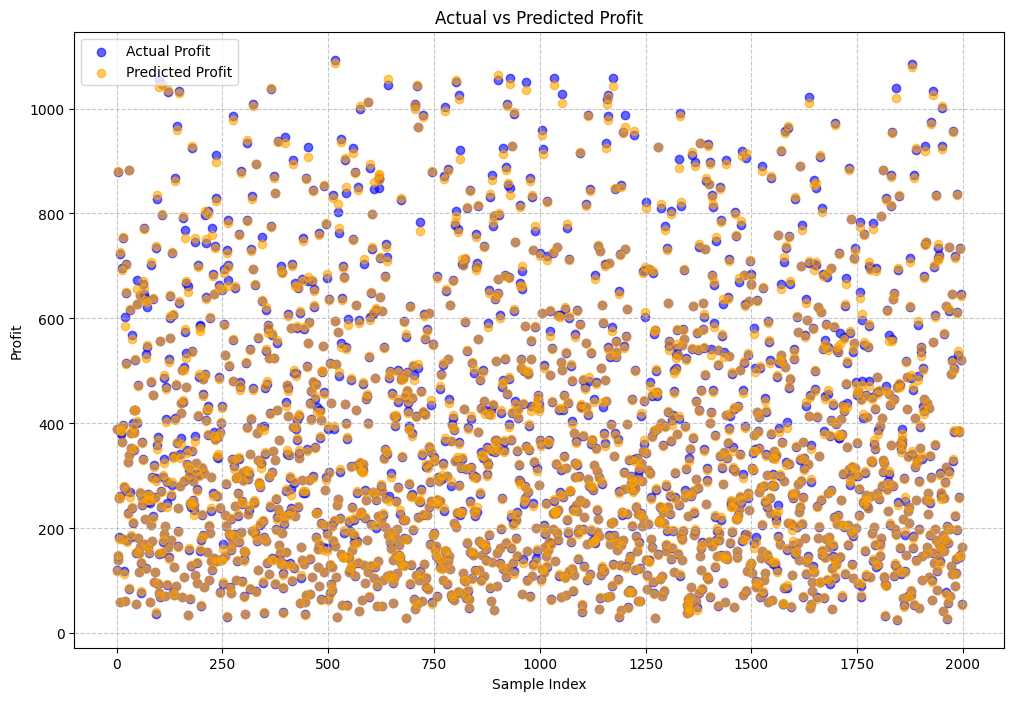

Optimized data saved as 'optimized_sales_data.csv'.


In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib

# Function to load and preprocess the data
def load_and_preprocess_data(file_path):
    df = pd.read_csv(file_path)
    print("Data Loaded Successfully")
    display(df.head())

    # Convert 'Date' column to datetime format
    df['Date'] = pd.to_datetime(df['Date'], format='%d-%b-%y')
    df['Year'] = df['Date'].dt.year
    df['Month'] = df['Date'].dt.month
    df['Day'] = df['Date'].dt.day

    # Handle missing values by dropping rows
    df = df.dropna()

    # Encode categorical columns
    categorical_columns = ['Category', 'Sub Category', 'City', 'Region', 'State']
    label_encoder = LabelEncoder()
    for col in categorical_columns:
        df[col] = label_encoder.fit_transform(df[col])

    # Create new feature: Profit Margin
    df['Profit Margin'] = df['Profit'] / df['Sales']

    return df

# Function to train the model
def train_model(df):
    X = df[['Sales', 'Discount', 'Profit Margin', 'Category', 'Sub Category', 'City', 'Region', 'State']]
    y = df['Profit']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = RandomForestRegressor(random_state=42)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f'Mean Absolute Error: {mae}')
    print(f'Mean Squared Error: {mse}')
    print(f'R-squared: {r2}')

    # Save the model
    joblib.dump(model, 'random_forest_model.pkl')
    print("Model saved as 'random_forest_model.pkl'")

    return model, y_test, y_pred

# Function to display visualizations
def show_visualizations(df, y_test, y_pred):
    # Correlation Heatmap
    print("\nCorrelation Heatmap:")
    plt.figure(figsize=(10, 6))
    numerical_df = df.select_dtypes(include=np.number)
    sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=1)
    plt.title("Correlation Heatmap")
    plt.show()

    # Profit Distribution
    print("\nProfit Distribution:")
    plt.figure(figsize=(10, 6))
    sns.histplot(df['Profit'], kde=True, color='blue')
    plt.title("Profit Distribution")
    plt.show()

    # Sales vs Profit
    print("\nSales vs Profit:")
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='Sales', y='Profit', data=df)
    plt.title("Sales vs Profit")
    plt.show()

    # Discount vs Profit
    print("\nDiscount vs Profit:")
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='Discount', y='Profit', data=df)
    plt.title("Discount vs Profit")
    plt.show()

    # Actual vs Predicted Profit
    print("\nActual vs Predicted Profit:")
    plt.figure(figsize=(12, 8))
    plt.scatter(range(len(y_test)), y_test, label='Actual Profit', color='blue', alpha=0.6)
    plt.scatter(range(len(y_pred)), y_pred, label='Predicted Profit', color='orange', alpha=0.6)
    plt.title("Actual vs Predicted Profit")
    plt.xlabel("Sample Index")
    plt.ylabel("Profit")
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend(loc='upper left')
    plt.show()

# Main function to run the workflow
def main():
    # Predefined file path
    file_path = r"C:/Users/MEDHA  TRUST/OneDrive/Desktop/pandas_project_folder/Madhu_Project/Final_supermartdata.csv"

    try:
        df = load_and_preprocess_data(file_path)

        # Train the model
        model, y_test, y_pred = train_model(df)

        # Display visualizations
        show_visualizations(df, y_test, y_pred)

        # Save optimized data
        df.to_csv('optimized_sales_data.csv', index=False)
        print("Optimized data saved as 'optimized_sales_data.csv'.")
    except FileNotFoundError:
        print("Error: File not found. Please check the file path.")
    except Exception as e:
        print(f"An error occurred: {e}")

if __name__ == "__main__":
    main()
